# ReverseSearch

### Imports

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

### Load data And prepare Net

- Caltech101 object dataset contain pictures of objects belonging to 101 categories.
- Use resnet because of small feature size(2048 convolutional features).
- It will be easy for the nearest neighbor algorithm to find neighbors and minimize the effects of curse of dimensionality.
- Create Resnet50 model without top layers to get convolutional features instead of class.

In [3]:
img_size =224
batch_size = 64

model = ResNet50(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')
root_dir = '../data/Dataset/101_ObjectCategories'
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
datagen = img_gen.flow_from_directory(root_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode=None, shuffle=False)
num_images = len(datagen.filenames)
num_epochs = int(math.ceil(num_images / batch_size))
feature_list = model.predict(datagen, num_epochs)

len(datagen.classes), feature_list.shape

Found 9144 images belonging to 102 classes.


(9144, (9144, 2048))

In [11]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [26]:
img_path = '../data/Dataset/101_ObjectCategories/Faces/image_0030.jpg'
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
test_img_features = model.predict(preprocessed_img, batch_size=1)

_, indices = neighbors.kneighbors(test_img_features)

### Find similar And Display

In [27]:
filenames = [root_dir + '/' + s for s in datagen.filenames]

def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,5,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

### Display

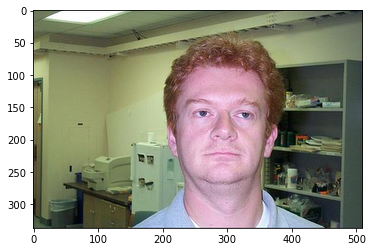

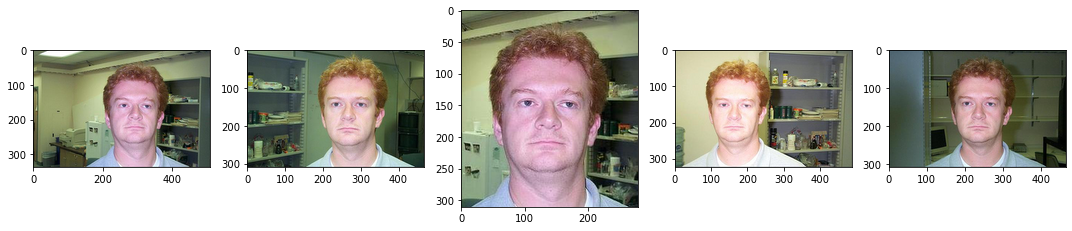

In [28]:
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
similar_images(indices[0])

### PCA And Diaplay
Reduce features dimensions

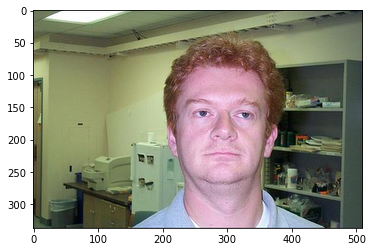

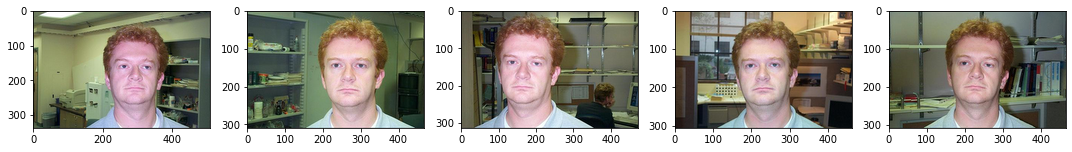

In [29]:
pca = PCA(n_components=100)
pca.fit(feature_list)
compressed_features = pca.transform(feature_list)

neighbors_pca_features = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
neighbors_pca_features.fit(compressed_features)

test_img_compressed = pca.transform(test_img_features)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)

plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
similar_images(indices[0])